In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

df_stocks = yf.download(["AMD", "BA", "BABA", "CCL", "COTY", "DIS", "F", "JD", "MSFT", "PYPL"], start="2022-10-14", end="2024-10-14", auto_adjust=True)

# logarithmic returns, difference in value between rows
returns = np.log(df_stocks).diff()
mean_return = returns['Close'].mean() * 252
mean_return

[*********************100%***********************]  10 of 10 completed


,0
Ticker,
AMD,0.553911
BA,0.063472
BABA,0.224720
CCL,0.530557
COTY,0.179530
DIS,0.002249
F,0.040062
JD,0.039321
MSFT,0.310841


In [2]:
# covariance
returns['Close'].cov() * 252

Ticker,AMD,BA,BABA,CCL,COTY,DIS,F,JD,MSFT,PYPL
Ticker,,,,,,,,,,
AMD,0.236358,0.035891,0.044607,0.099669,0.050286,0.037558,0.049140,0.055455,0.063968,0.050160
BA,0.035891,0.104960,0.031943,0.052118,0.029396,0.021004,0.032442,0.044965,0.016143,0.027578
BABA,0.044607,0.031943,0.190567,0.061216,0.050966,0.023286,0.028790,0.188560,0.012159,0.041248
CCL,0.099669,0.052118,0.061216,0.246063,0.070900,0.057102,0.081975,0.078455,0.039834,0.069374
COTY,0.050286,0.029396,0.050966,0.070900,0.117294,0.034696,0.040421,0.059151,0.024740,0.047688
DIS,0.037558,0.021004,0.023286,0.057102,0.034696,0.086832,0.035439,0.030674,0.023262,0.029427
F,0.049140,0.032442,0.028790,0.081975,0.040421,0.035439,0.135599,0.038778,0.025016,0.046224
JD,0.055455,0.044965,0.188560,0.078455,0.059151,0.030674,0.038778,0.280104,0.013268,0.053832
MSFT,0.063968,0.016143,0.012159,0.039834,0.024740,0.023262,0.025016,0.013268,0.062798,0.027992


In [3]:
# correlation
returns['Close'].corr()

Ticker,AMD,BA,BABA,CCL,COTY,DIS,F,JD,MSFT,PYPL
Ticker,,,,,,,,,,
AMD,1.000000,0.227873,0.210180,0.413285,0.302010,0.262168,0.274486,0.215524,0.525053,0.276231
BA,0.227873,1.000000,0.225858,0.324304,0.264939,0.220013,0.271937,0.262242,0.198833,0.227910
BABA,0.210180,0.225858,1.000000,0.282696,0.340895,0.181023,0.179100,0.816141,0.111145,0.252981
CCL,0.413285,0.324304,0.282696,1.000000,0.417338,0.390647,0.448779,0.298839,0.320453,0.374435
COTY,0.302010,0.264939,0.340895,0.417338,1.000000,0.343798,0.320508,0.326337,0.288266,0.372803
DIS,0.262168,0.220013,0.181023,0.390647,0.343798,1.000000,0.326595,0.196683,0.315017,0.267371
F,0.274486,0.271937,0.179100,0.448779,0.320508,0.326595,1.000000,0.198977,0.271093,0.336078
JD,0.215524,0.262242,0.816141,0.298839,0.326337,0.196683,0.198977,1.000000,0.100037,0.272321
MSFT,0.525053,0.198833,0.111145,0.320453,0.288266,0.315017,0.271093,0.100037,1.000000,0.299065


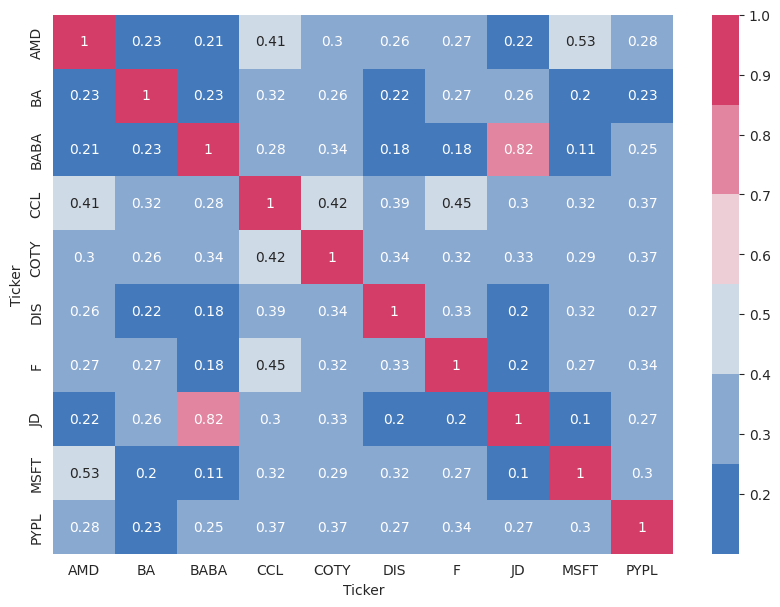

In [4]:
# create a heatmap for better visualization of correlations
sns.set_style('whitegrid');
plt.figure(figsize=(10, 7))

sns.heatmap(returns['Close'].corr(), annot=True, cmap=sns.diverging_palette(250, 0));

In [5]:
# generate random weighted values for each stock that add up to 1
num_stocks = 10
weights = np.random.random(num_stocks)
weights /= np.sum(weights)
weights

array([0.09149405, 0.03964828, 0.02754746, 0.0579191 , 0.09432127,
       0.15392232, 0.13963427, 0.06904771, 0.1786047 , 0.14786086])

In [6]:
# calculating return of randomly generated portfolio weights
np.sum(weights * returns['Close'].mean()) * 252

0.17125935091008646

In [7]:
# calculating portfolio volatility
np.sqrt(np.dot(weights.T, np.dot(returns['Close'].cov() * 252, weights)))

0.2246799646966953

In [8]:
# Analyzing 10,000 combinations

risk_free_rate = .0407 # approximate 10 year treasury yield

port_return = []
port_vol = []
port_sharpe = []
port_weights=[]

# generate random weights
for i in range(10000):
  p_weights = np.random.random(num_stocks)
  p_weights /= np.sum(p_weights)

  # add portfolio returns of randomly generated weights to list
  return_1 = (np.sum(p_weights * returns['Close'].mean()) * 252)
  port_return.append(return_1)

  # add volatility to list
  vol_1 = (np.sqrt(np.dot(p_weights.T, np.dot(returns['Close'].cov() * 252, p_weights))))
  port_vol.append(vol_1)

  # add sharpe ratio to list
  sharpe_1 = (return_1 - risk_free_rate) / vol_1
  port_sharpe.append(sharpe_1)

  # add weights to list
  port_weights.append(p_weights)

# convert to numpy arrays
port_return = np.array(port_return)
port_vol = np.array(port_vol)
port_sharpe = np.array(port_sharpe)
port_weights = np.array(port_weights)

port_return, port_vol, port_sharpe, port_weights

# 33s run time

(array([0.2096228 , 0.14165646, 0.24069411, ..., 0.15985255, 0.27949023,
        0.16519052]),
 array([0.24644477, 0.23489647, 0.24391023, ..., 0.2495769 , 0.27269501,
        0.22358317]),
 array([0.68543875, 0.42979133, 0.81994966, ..., 0.4774182 , 0.87566776,
        0.55679736]),
 array([[0.1591446 , 0.02462866, 0.11320822, ..., 0.06512105, 0.0706029 ,
         0.13527529],
        [0.05032237, 0.09526216, 0.04790159, ..., 0.04696927, 0.05580449,
         0.10442957],
        [0.13916725, 0.11381418, 0.05855631, ..., 0.10457469, 0.16172994,
         0.06194381],
        ...,
        [0.03668907, 0.10895315, 0.10355028, ..., 0.1161258 , 0.03471222,
         0.17051097],
        [0.19655257, 0.13862271, 0.02919319, ..., 0.12949535, 0.08196668,
         0.00332736],
        [0.14438747, 0.11879968, 0.02629609, ..., 0.01078301, 0.11119888,
         0.11455075]]))

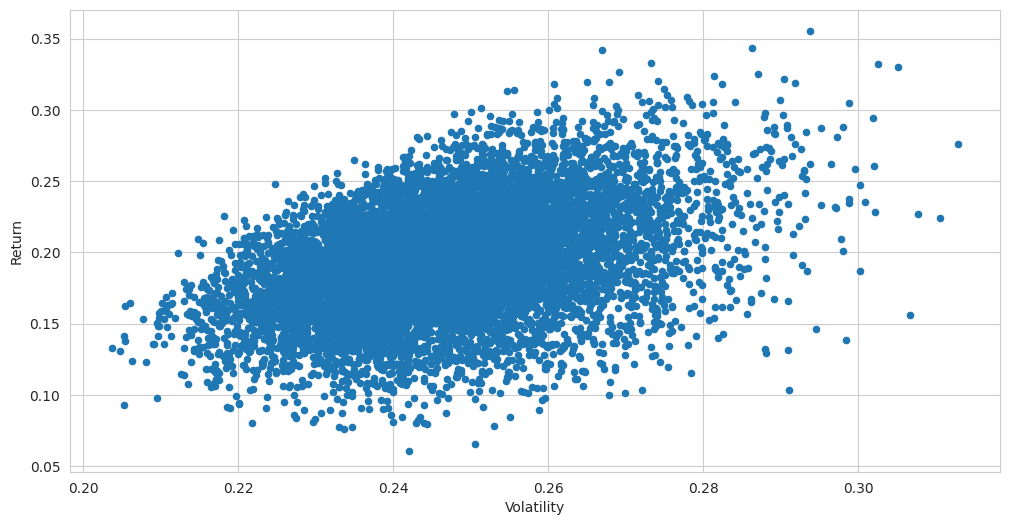

In [9]:
# create a dataframe to plot the efficient frontier

port_ef = pd.DataFrame({'Return': port_return, 'Volatility': port_vol})

port_ef.plot(x='Volatility', y='Return', kind='scatter', figsize=(12, 6), grid=True);


In [10]:
# return index of largest sharpe value
sharpe_index = port_sharpe.argmax() # .argmax - Returns the indices of the maximum values along an axis
sharpe_index

7655

In [11]:
# find the portfolio weighting at that index
i = 0
while i < num_stocks:
  print("Stock : %s : %.2f" % (df_stocks.columns[i], port_weights[sharpe_index][i] * 100))
  i += 1

# find volatility
print("Volatility : %.2f" % port_vol[sharpe_index])

# find return
print("Return : %.2f" % port_return[sharpe_index])


Stock : ('Close', 'AMD') : 16.50
Stock : ('Close', 'BA') : 5.95
Stock : ('Close', 'BABA') : 4.52
Stock : ('Close', 'CCL') : 26.95
Stock : ('Close', 'COTY') : 2.20
Stock : ('Close', 'DIS') : 7.67
Stock : ('Close', 'F') : 4.48
Stock : ('Close', 'JD') : 1.73
Stock : ('Close', 'MSFT') : 28.14
Stock : ('Close', 'PYPL') : 1.87
Volatility : 0.27
Return : 0.34
